In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [84]:
dataset_train

Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]

In [85]:
training_Set=dataset_train.iloc[:,1:2]

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler=MinMaxScaler()

In [88]:
scaled=scaler.fit_transform(training_Set)

In [89]:
X_train=[]
y_train=[]
for i in range(60,len(scaled)):
    X_train.append(scaled[i-60:i,0])
    y_train.append(scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [90]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [91]:
from keras.models import Sequential
from keras.layers import * 

In [92]:
regressor=Sequential()

In [93]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [94]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [95]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0477A
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0078
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - l

In [96]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs_Scaled=scaler.transform(inputs)

In [108]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs_Scaled[i-60:i,0])


In [109]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [110]:
predicted=regressor.predict(X_test)

In [111]:
final_pred=scaler.inverse_transform(predicted)

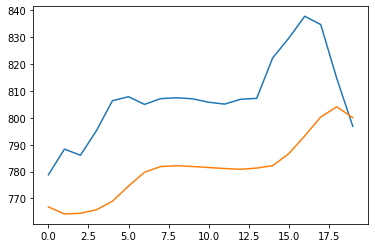

In [113]:
plt.plot(dataset_test.iloc[:,1:2].values)
plt.plot(final_pred)

In [114]:
final_pred


array([[766.8472 ],
       [764.2433 ],
       [764.48206],
       [765.79315],
       [768.9747 ],
       [774.60126],
       [779.758  ],
       [781.8634 ],
       [782.17633],
       [781.8789 ],
       [781.52234],
       [781.13226],
       [780.8478 ],
       [781.29663],
       [782.20337],
       [786.64355],
       [793.25885],
       [800.31824],
       [804.09326],
       [800.06903]], dtype=float32)